# HW 6

**Upload two files** to Gradescope: 
* `HW6.ipynb` (run all cells to make sure that outputs are visible, especially plots)
* `HW6.py` (which will be autograded)

___

In [3]:
import matplotlib.pyplot as plt

### Hash Function
Write a function **`cu_hash(identikey, modulus)`** that takes a CU Identikey in the form of a string and returns its hash value. Assume that the `identikey` string consists of 4 lower-case letters followed by 4 digits. The hash value is calculated as follows:
* each letter in the Identikey is converted into Unicode by calling `ord()`.
* the four `ord()` values are concatenated to the four digits in the Identikey to create a `hashnum`.
* the function returns `hashnum % modulus` as the hash value.

Example:<br>
`cu_hash('pyth2022', 93)` returns `15` because `hashnum` equals `1121211161042022` and `hashnum % 93` equals `15`.

In [4]:
def cu_hash(identikey, modulus):
    hashnum = ''
    for i in identikey[:4]:
      hashnum += str(ord(i))
    hashnum += identikey[4:]
    return int(hashnum) % modulus

In [5]:
cu_hash('pyth2022', 93)

15

### Nodes
Below is a class `Node` that will store a key and data, along with links to neighboring nodes in a `DLinkedList`. 

In [6]:
class Node:
    def __init__(self, key, data):
        self.key = key
        self.data = data
        self.prev = None
        self.next = None

### DLinkedList
Use the `DLinkedList` class (defined in a previous assignment) with the  attribute:
* **`head`** 

and the  methods:
* **`insert`**, **`delete`**, **`search`**, **`keys`**.

In [7]:
class DLinkedList:
    def __init__(self):
        self.head = None
    
    def insert(self,node):
        if self.head == None:
            self.head = node
        else:
            node.next = self.head
            self.head.prev = node
            self.head = node

    def delete(self, node):
        if node.next == None and node.prev == None:
            self.head = None
        elif node.next == None:
            node.prev.next = None
        elif node.prev == None:
            node.next.prev = None
            self.head = node.next
        else:
            node.prev.next = node.next
            node.next.prev = node.prev

    def search(self, value):
        if self.head == None:
            return None
        node = self.head
        while node.next != None:
            if node.key == value:
                return node
            else:
                node = node.next
        if node.key == value:
            return node
        else:
            return None


    def keys(self):
        key_lst = []
        if self.head == None:
            return None
        node = self.head
        while node.next != None:
            key_lst.append(node.key)
            node = node.next
        key_lst.append(node.key)
        return key_lst        


### CU Identikey Hash Table
In order to make a hash table for CU student records, create a **`CUHashTable`** class with these attributes:
* **`num_slots`**: number of slots in the table (passed as an argument)
* **`slots`**: a list with `num_slots` elements initialized to `None`. Later these slots will be filled with `DLinkedList`s (defined in a previous assignment).

and these methods:
* **`insert(id, name)`**: takes a student's Identikey and name and does the following:
  * Creates a new `Node` with the `key` and `data` attributes equal to the student Identikey and name, respectively.
  * Calculates the table slot number for the Identikey by calling `cu_hash()` with `num_slots` as the modulus.
  * If the associated table slot is empty, insert a new `DLinkedList` consisting of the new `Node`. 
  * If the associated table slot is already filled, insert the new `Node` to the head of the existing `DLinkedList`.
* **`lookup(id)`**: takes an Identikey and returns the corresponding `Node`. If not found, return `None`.

Example:
```
table = CUHashTable(93)
table.insert('pyth2022', 'Guido Von Rossum')
table.insert('buff8039', 'Ralphie')
table.insert('macu1234', 'Marie Curie')
```
stores the first and third tuples in slot 15, and stores the second tuple in a different slot. Then
```
table.lookup('pyth2022').data
```
returns `'Guido Von Rossum'` and
```
table.lookup('abcd9999')
```
returns `None`.

In [8]:
class CUHashTable:

    def __init__(self, num_slots):
        self.num_slots = num_slots
        self.slots = [None for n in range(num_slots)]

    def insert(self,id, name):
        new_node = Node(id, name)
        if self.slots[cu_hash(id, self.num_slots)] == None:
            new_linklst = DLinkedList()
            new_linklst.insert(new_node)
            self.slots[cu_hash(id, self.num_slots)] = new_linklst
        else:
            self.slots[cu_hash(id, self.num_slots)].insert(new_node)

    def lookup(self,id):
        try:
            return self.slots[cu_hash(id, self.num_slots)].search(id)
        except:
            return None
    
        

In [9]:
table = CUHashTable(93)
table.insert('pyth2022', 'Guido Von Rossum')
table.insert('buff8039', 'Ralphie')
table.insert('macu1234', 'Marie Curie')

In [10]:
table.lookup('pyth2022').data, table.lookup('abcd1234')

('Guido Von Rossum', None)

___

### Triangle Class
In the **`Triangle`** class, defined below, each `Triangle` object is determined by a list of vertex coordinates and includes the following method:

* **`draw(self, color='k')`** displays the colored triangle. The default color is black.

Example:<br>
`Triangle([(0, 0), (4, 0), (4, 3)]).draw('b')` displays the following:

<img src = "http://www.coloradomath.org/python/triangle_blue.jpg" width="372" height="248" />

In [18]:
class Triangle:
    def __init__(self, coords):
        self.coords = coords
        
    def draw(self, color='k'):
        xcoords, ycoords = zip(*self.coords)

        plt.fill(xcoords, ycoords, color=color)       

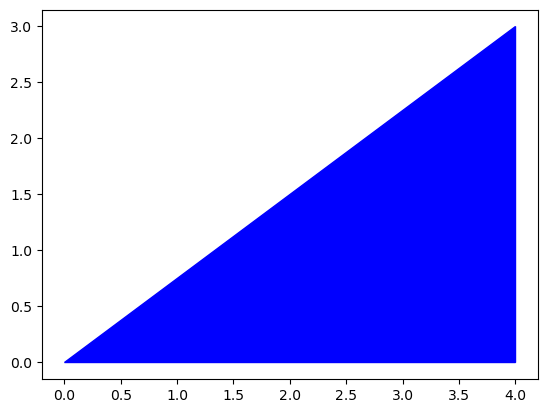

In [12]:
Triangle([(0, 0), (4, 0), (4, 3)]).draw('b')

### EquilTriangle Subclass

The **EquilTriangle** subclass, defined below, inherits all the properties of the `Triangle` class. Each `EquilTriangle` object has a side parallel to the $x$-axis. It is defined by 
* the (x, y) location of its left vertex,
* its side length, and
* its orientation (either `'up'` (default) or `'down'`).

Example:<br>
`EquilTriangle((2, 1), 3, 'down').draw()` displays

<img src = "http://www.coloradomath.org/python/equiltriangle_black.jpg" width="381" height="248" />

In [19]:
class EquilTriangle(Triangle):
    def __init__(self, loc, sidelen, up_down='up'):
        x, y = loc
        
        tri_hgt = sidelen * 3**0.5/2
        if up_down == 'down':
            tri_hgt *= -1
    
        coords = [loc, (x+sidelen, y), (x+sidelen/2, y + tri_hgt)]
        Triangle.__init__(self, coords)

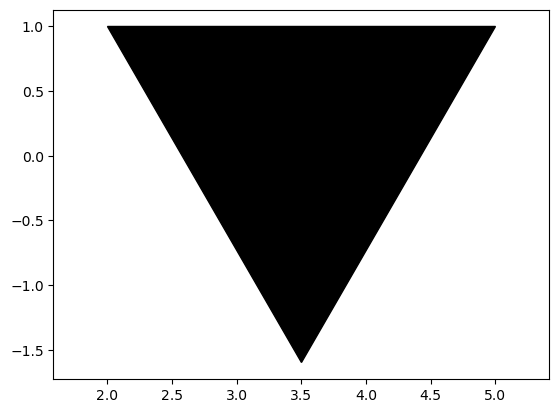

In [14]:
plt.axis('equal')
EquilTriangle((2, 1), 3, 'down').draw()

### Sierpinski Triangle
The *Sierpinski triangle*, also called the Sierpinski gasket or Sierpinski sieve, is a self-similar fractal formed by an equilateral triangle subdivided recursively into smaller equilateral triangles.

<img src = "http://www.coloradomath.org/python/sierpinskis.jpg" width="717" height="118" />

Write a function called **`sierpinski(nlevels, bg_color='k', fg_color='w')`** that draws an `n`-level Sierpinski triangle using the specified background and foreground colors. The default colors are black and white, respectively. It should **use recursion** and call the `EquilTriangle` drawing method (and no other drawing functions). Shown above are the results for the `n` values 0, 1, 2, 3, and 4, using the default colors.

In [171]:
def draw_sierpinski_rec2(nlevel, loc, sidelen, bg_color='k'):
    plt.axis('equal')
    if nlevel == 0:
        EquilTriangle(loc, sidelen).draw(bg_color)
    else:
        tri_hgt = sidelen * 3**0.5 / 2
        draw_sierpinski_rec2(nlevel - 1, loc, sidelen / 2, bg_color)
        draw_sierpinski_rec2(nlevel - 1, (loc[0] + sidelen / 2, loc[1]), sidelen / 2, bg_color)
        draw_sierpinski_rec2(nlevel - 1, (loc[0] + sidelen / 4, loc[1] + tri_hgt / 2), sidelen / 2, bg_color)

In [172]:
def sierpinski(nlevels, bg_color='k', fg_color='w'):
    plt.axis('equal')
    EquilTriangle((0,0),1).draw(fg_color)
    draw_sierpinski_rec2(nlevels, (0,0), 1, bg_color)


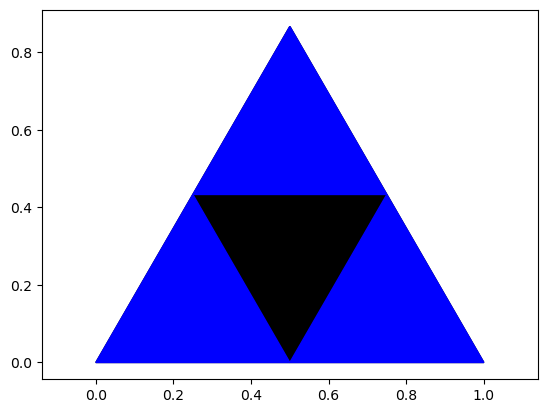

In [173]:
sierpinski(1,'b','k')

**Draw a Sierpinski triangle** for n=4 with a background color of blue and a foreground color of white.

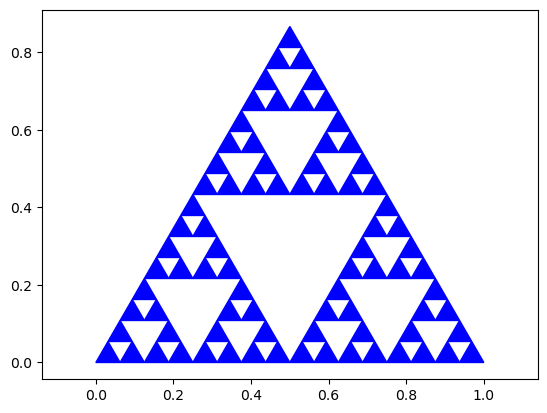

In [169]:
sierpinski(4, 'b')

**Draw a Sierpinski triangle** for n=7 with the blue and white colors reversed.

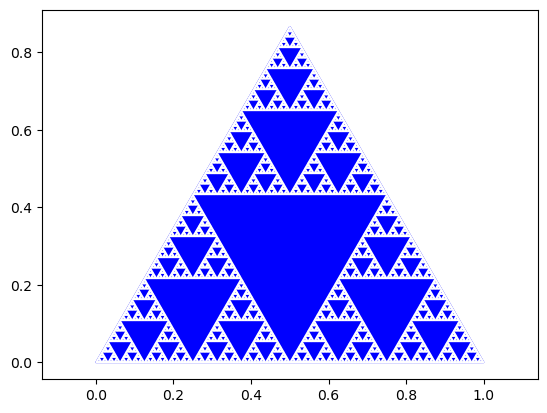

In [170]:
sierpinski(7, 'w', 'b')